In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from forLightning import *
from torchvision.datasets import MNIST
import proplot as pplt
import random
from torch import utils, transforms


ImportError: cannot import name 'transforms' from 'torch' (/Users/vepr/miniforge3/lib/python3.9/site-packages/torch/__init__.py)

In [25]:
tr = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()]);
dataset = MNIST(os.getcwd(), download=True, transform=tr )
train_loader = utils.data.DataLoader(dataset)

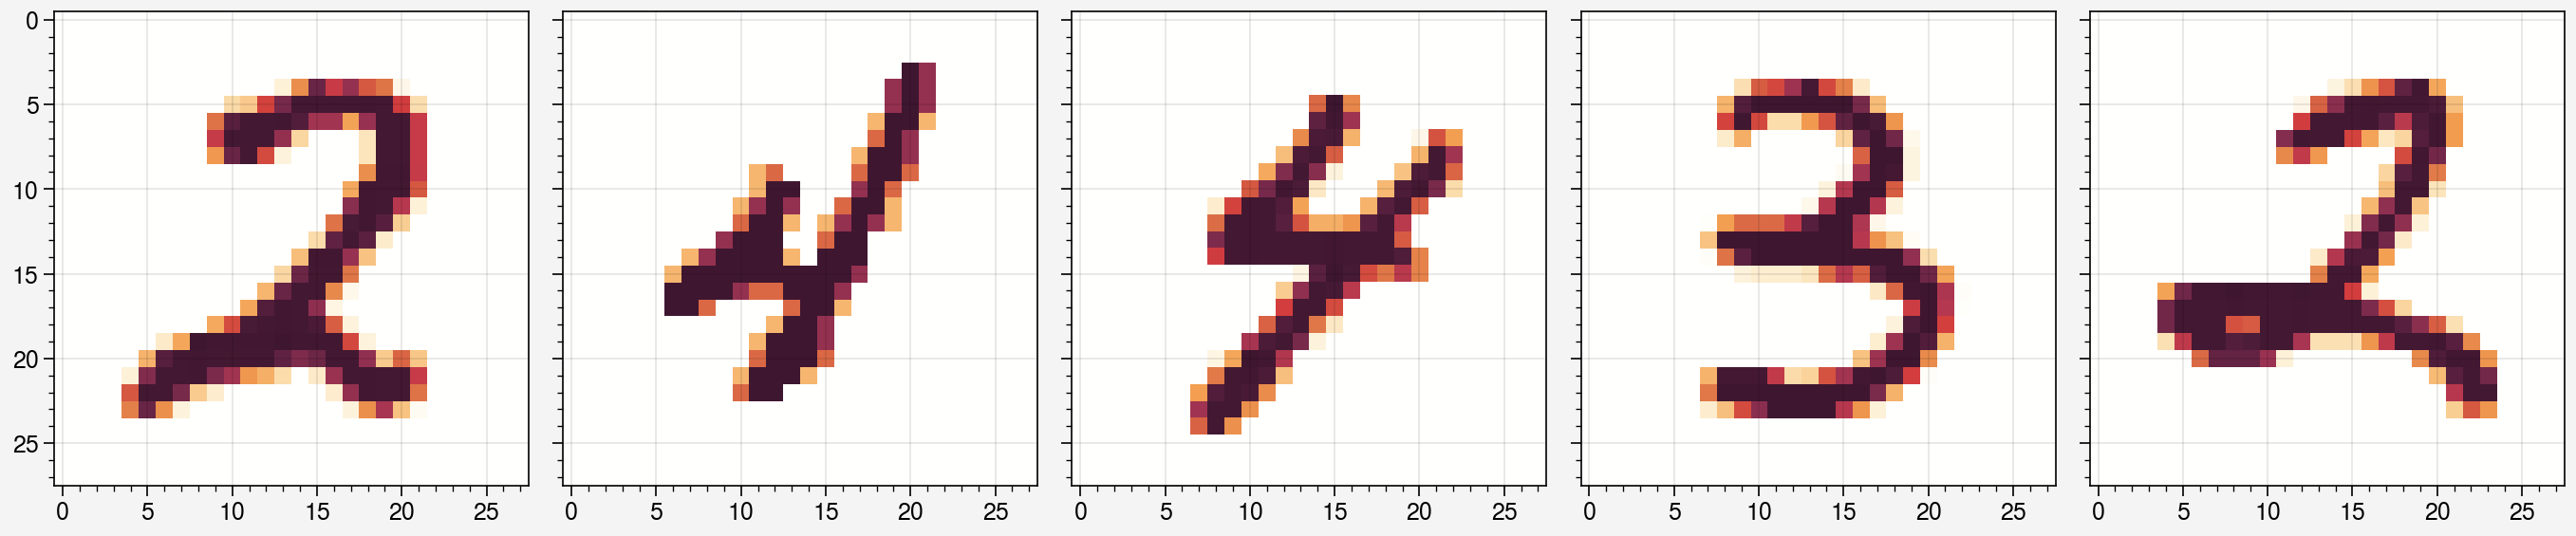

In [50]:
#sample = next(iter(train_loader))[0].squeeze()

samples=  5
f2,a2 = pplt.subplots(ncols=samples)
for ij,j in enumerate(random.sample(range(train_loader.dataset.data.shape[0]),k=samples)):
    a2[ij].imshow(train_loader.dataset.data[j])

In [51]:
betaAutoencoder = BetaVAE_B(z_dim=10,nc=1,epochs=10,batch_size=24)

In [52]:
trainer = pl.Trainer(limit_train_batches=betaAutoencoder.batch_size, max_epochs=betaAutoencoder.epochs)
trainer.fit(model=betaAutoencoder, train_dataloaders=train_loader)



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 252 K 
1 | decoder | Sequential | 249 K 
---------------------------------------
502 K     Trainable params
0         Non-trainable params
502 K     Total params
2.008     Total estimated model params size (MB)
/Users/vepr/miniforge3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/vepr/miniforge3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training ba

Epoch 0:   0%|          | 0/24 [00:00<?, ?it/s] 

/Users/vepr/miniforge3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 9: 100%|██████████| 24/24 [00:05<00:00,  4.42it/s, loss=6.15e+03, v_num=13]


In [54]:
encoder = betaAutoencoder.encoder.eval()
net = betaAutoencoder.eval()

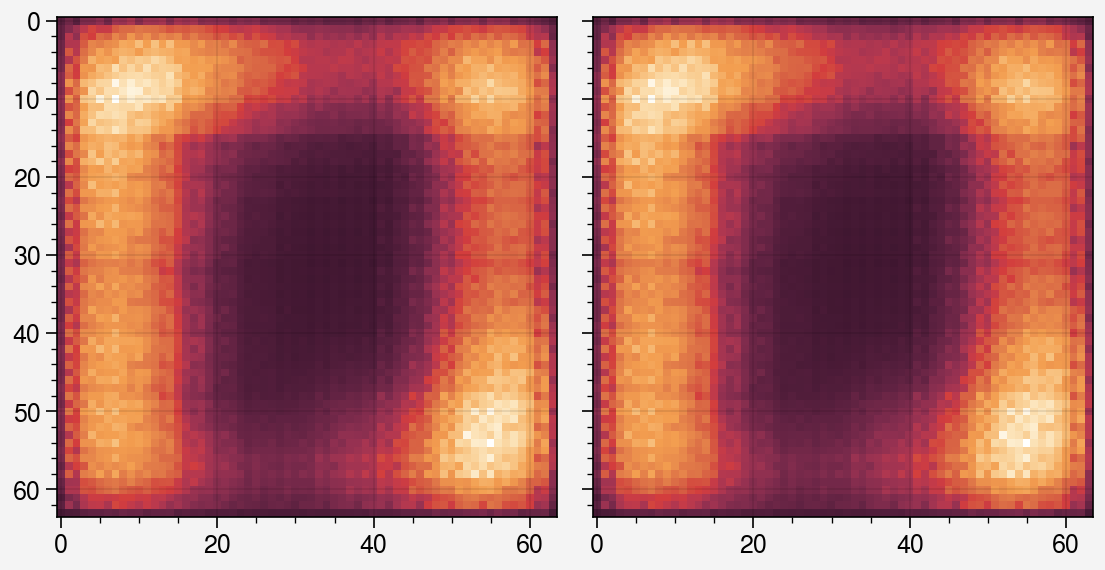

In [62]:
gendata = net(next(iter(train_loader))[0]).squeeze()
f2,a2 = pplt.subplots(ncols=train_loader.batch_size)
for ij,j in enumerate(range(train_loader.batch_size)):
    a2[ij].imshow(gendata[j].detach().numpy())
    

In [ ]:
train_loader.dataset.data[1:10].shape

In [ ]:
type(train_loader.dataset.data[1:10].numpy())

In [ ]:
tr(train_loader.dataset.data[1:10].numpy())

In [ ]:
encoder(train_loader.dataset.data[1:10])